from the scrach

In [1]:
# standard library 
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#load raw  Telco Customer Churn Prediction IMB data set
churn1=pd.read_csv(r'C:\first_data_science_proj\customer_churn_prediction\data\raw\churn_Prediction_IBM.csv')
pd.set_option('display.max_columns',None)
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn1.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
churn1.shape

(7043, 21)

In [5]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# fix the dtypes for the columns
churn1['TotalCharges']=pd.to_numeric(churn1['TotalCharges'],errors='coerce')
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
churn1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total charges has 11 Nan values 

In [8]:
churn1['TotalCharges']=churn1['TotalCharges'].fillna(churn1['tenure'] * churn1['MonthlyCharges'])
churn1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

the nan values is filled with the tenure * monthly charges

<Axes: >

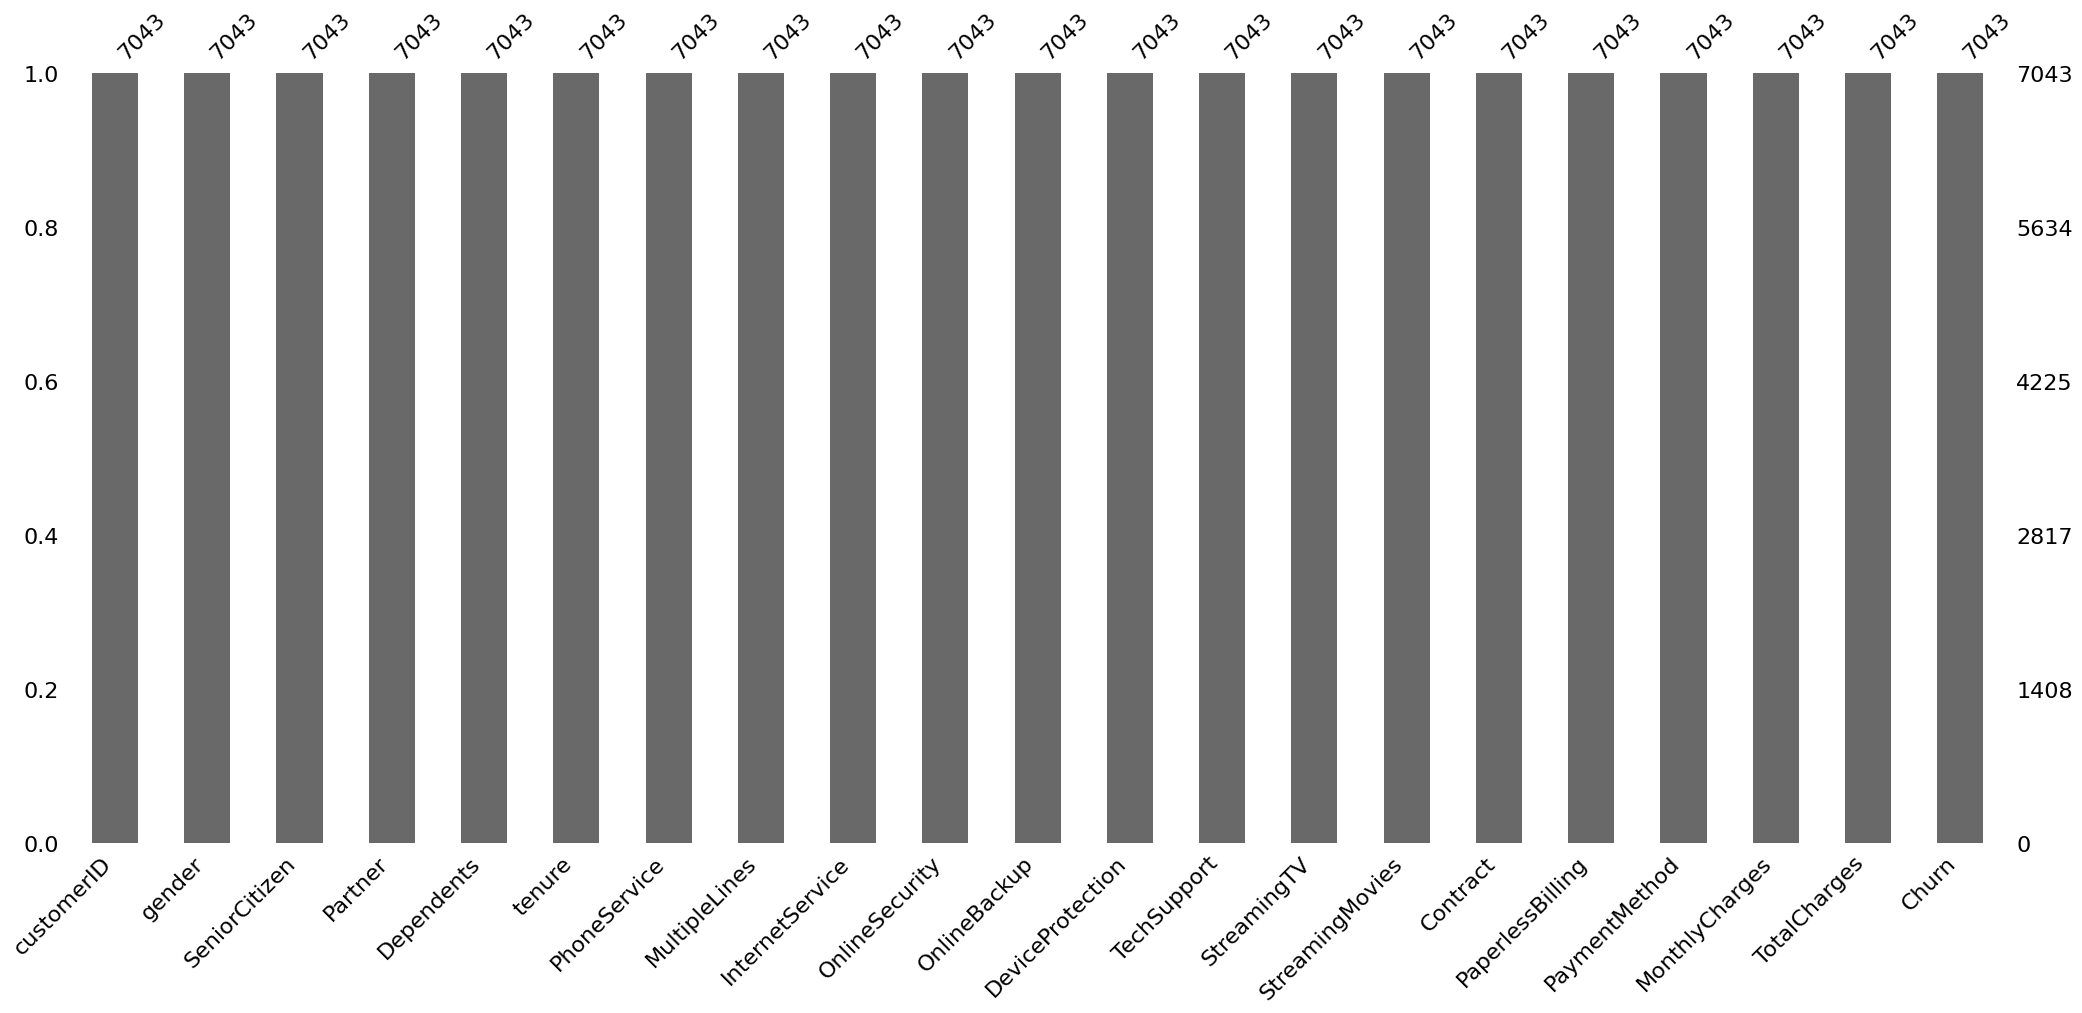

In [9]:
msno.bar(churn1)

In [10]:
churn1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
churn1.shape

(7043, 21)

In [12]:
# drop the customerID column as it is not useful for analysis
churn1=churn1.drop(['customerID'],axis=1)

In [13]:
churn1.shape

(7043, 20)

In [14]:
churn1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# # seniorcitizen feature fix
# seniorcitizen is represented as 0 and 1 we convert it to categorical features --> 'No' and 'Yes' 
# ensure seniorcitizen is numeric, coerce non-numeric values to NaN, fill NaN with 0, then convert to int
churn1['SeniorCitizen']=pd.to_numeric(churn1['SeniorCitizen'],errors='coerce').fillna(0).astype(int)

# now we apply the mapping from 0 to 'No' and 1 to 'Yes'
churn1['SeniorCitizen']=churn1['SeniorCitizen'].map({0:'No',1:'Yes'})
churn1['SeniorCitizen'].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [16]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
churn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Feature engineering and Preprocesssing steps 

In [ ]:
# 1. Tenure group --> by  years :
churn1['tenure_group']=pd.cut(churn1['tenure'],bins=[-1,12,24,48,60,71],labels=['0-1 ','1-2 ','2-4 ','4-5 ','5-6 '])

# 2. Is fiber optic connection --> largest churn factor:
churn1['FiberOptic']=(churn1['InternetService']=='Fiber optic').astype(int)

# 3. Partner or dependets -->family =--> less churn:
churn1['Family']=((churn1['Partner']=='Yes')| (churn1['Dependents']=='Yes')).astype(int)

# 4. Count of productive services subscribed:
service_cols=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
churn1['ProtectiveServices']= (churn1[service_cols]=='Yes').sum(axis=1)

# 5.Streaming addictedness:
Stremeaning_cols=['StreamingTV','StreamingMovies']
churn1['StreamingAddict']= (churn1[Stremeaning_cols]=='Yes').sum(axis=1)

# 6. Contract risk score (manual ordinal)
churn1['ContractScore']= churn1['Contract'].map({'Month-to-month':3,'One year':2,'Two year':1})

# 7. Payment risk score
churn1['PaymentRisk']= churn1['PaymentMethod'].map({'Electronic check':4,'Mailed check':3,'Bank transfer (automatic)':2,
                                                  'Credit card (automatic)':1})

# 8. Highest monthly charge flag
churn1['HighCharges']=(churn1['MonthlyCharges']>70).astype(int)

# 9.  Average montly spend (Better than totalcharges)
churn1['AvgMonthlySpend']=churn1['TotalCharges']/ (churn1['tenure']+1) # +1 to avoid divide by zero

# 10. Early life customer
churn1['Newcustomer']= (churn1['tenure']<=6).astype(int)

In [20]:
churn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,FiberOptic,Family,ProtectiveServices,StreamingAddict,ContractScore,PaymentRisk,HighCharges,AvgMonthlySpend,Newcustomer
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1,0,1,1,0,3,4,0,14.925000,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-4,0,0,2,0,2,3,0,53.985714,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1,0,0,2,0,3,3,0,36.050000,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-4,0,0,3,0,2,2,0,40.016304,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1,1,0,0,0,3,4,1,50.550000,1


In [21]:
churn1.shape

(7043, 30)

In [ ]:
#change  'No Internet Service'/'No Phone Service' to No
# 


cols_to_clean= ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                'StreamingTV','StreamingMovies','MultipleLines']
for col in cols_to_clean:
  churn1[col]=churn1[col].replace({'No internet service':'No','No phone service':'No'})
  print(churn1[col].value_counts())

OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


In [23]:
# encode target feature
churn1['Churn']=churn1['Churn'].map({'Yes':1,'No':0})
churn1['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [24]:
churn1.shape

(7043, 30)

In [25]:
churn1.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group',
 'FiberOptic',
 'Family',
 'ProtectiveServices',
 'StreamingAddict',
 'ContractScore',
 'PaymentRisk',
 'HighCharges',
 'AvgMonthlySpend',
 'Newcustomer']

In [26]:
churn1.to_csv(r'C:\first_data_science_proj\customer_churn_prediction\data\processed\churn_preprocessed_v2.csv',index=False)
